<a href="https://colab.research.google.com/github/Eric-Oliveira-ds/Data-Science-Projetos-Portfolio/blob/main/Prevendo_preco_de_imoveis_em_King_County_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prevendo Preços  de imóveis em King County EUA com Regressão Linear

## Questão de Negócio

#####Temos um problema de negócio onde o principal alvo é prever os preços das casas na região de King Country nos Estados Unidos.Pois apartir desta previsão é possível criar estratégias de negócio para aquisição de receita por exemplo, de acordo com os atributos existentes nos imóveis.

## Entedimento do Negócio

#####Bom, temos um trabalho de regressão, porque nosso alvo no problema de negócio possui um destino numérico.A regressão em tarefa de Aprendizado de Máquina tenta estimar ou prever para cada indivíduo o valor numérico de alguma variável que pertence a ele. O objetivo do modelo é encontrar a relação entre uma variável dependente (denotada por Y) e uma série de outras variáveis Independentes (denotados por X).

 Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015.

Fonte dos dados :
https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv

##Importes dos pacotes necessários para as análises.

In [1]:
import pandas            as pd 
import numpy             as np
import scipy             as sp
import seaborn           as sns 
import matplotlib.pyplot as plt
from scipy        import stats
%matplotlib inline
 
plt.style.use="ggplot"
sns.set_style("darkgrid")
 
import warnings
warnings.filterwarnings('ignore')

##Dicionário de variáveis(colunas da tabela)
 
id    -- índices de registros
  
date  -- datas dos registros
 
price -- preço das casas
 
bedrooms-- números de quartos de dormir
 
bathrooms-- número de banheiros
 
floors -- número de andares
 
waterfront -- na beira do mar
 
view -- Vista para paisagens
 
condition -- Doenças que atingem o local
 
grade -- notas da casa
 
lat -- latitude
 
long -- longitude

##Carregando o conjunto de dados

In [2]:
df = pd.read_csv("/content/drive/My Drive/house_prices.csv")

##(EDA)-- Análise exploratória de dados

In [3]:
df.head ()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# tamanho da base
df.shape

(21613, 21)

In [5]:
#identificando se há valores nulos nos dados
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Verifica se tem valores duplicados em sua totalidade
df.duplicated().sum()

0

In [7]:
#informação de cada tipo de dados nas colunas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe() #estatística descrita dos dados

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Correlação dos dados

In [9]:
correlacao = df.corr() #instânciando as correlações dos dados na variável correlação

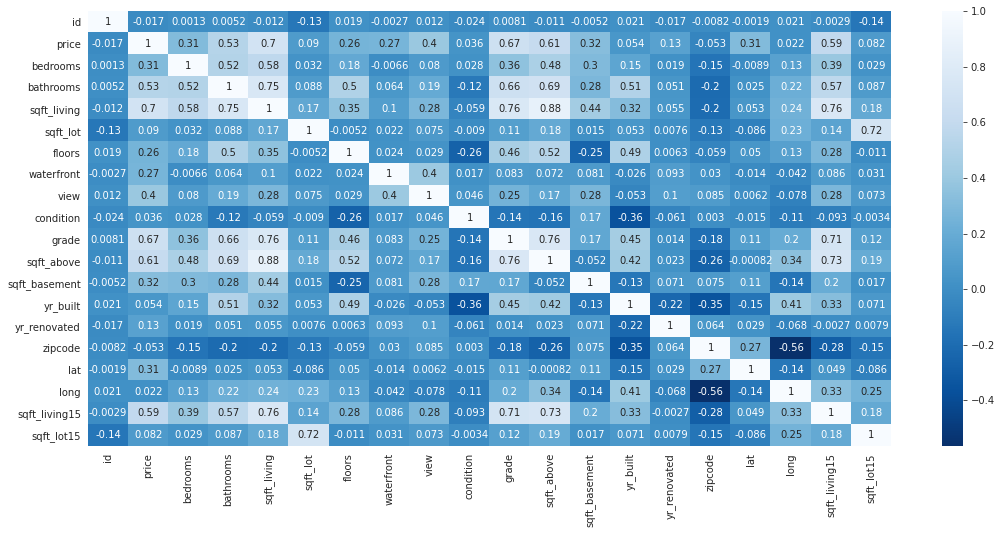

In [10]:
# plotando a figura das correlações 
plt.figure (figsize=(18,8))
sns.heatmap (correlacao, annot= True,cmap='Blues_r');

•Quanto mais próximo de 1 é o valor , logo se tem uma forte correlação positiva.

•Quanto mais próximo de -1 é o valor,logo se tem uma forte correlação negativa.

####Visualizando relações e padrões entre as variáveis destaques e a variável alvo

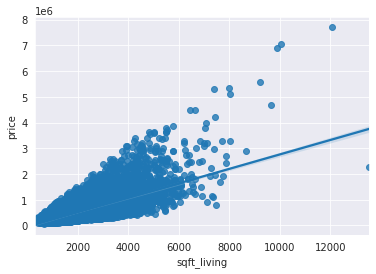

In [11]:
# pés quadrados vivos x preço 
sns.regplot(df.sqft_living,df.price);

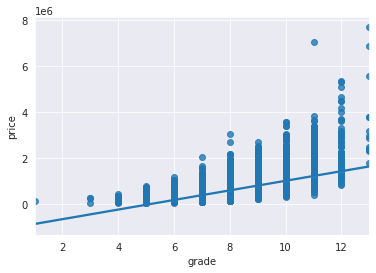

In [12]:

# Notas da casa x preço 
sns.regplot(df.grade,df.price);

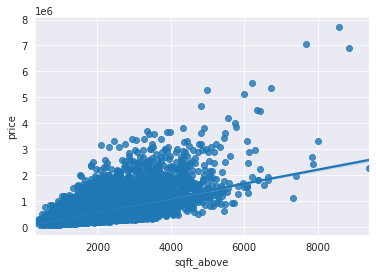

In [13]:
# Pés quadrados acima x preço 
sns.regplot(df.sqft_above,df.price);

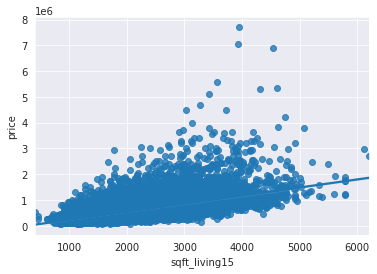

In [14]:

# Pés quadrados acima de 15 metros x preço 
sns.regplot(df.sqft_living15,df.price);

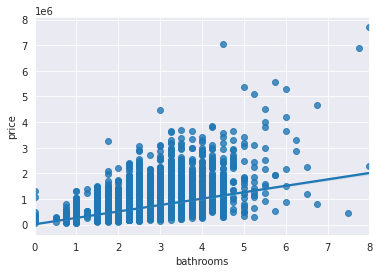

In [15]:

# Número de banheiro x preço 
sns.regplot(df.bathrooms,df.price);

####Visualizando a distribuição da variável dependente preço--(price)

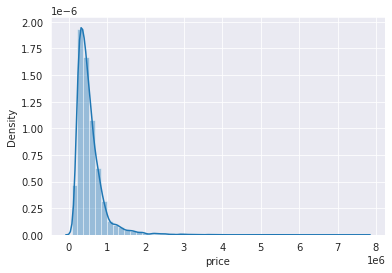

In [16]:
sns.distplot(df.price);

visualização da distribuição da variável preço

In [17]:
# imprime o coeficiente de pearson
print ("Valor maior que 1 implica em distribuição assimétrica positiva")
print ("")
stats.skew(df.price)

Valor maior que 1 implica em distribuição assimétrica positiva



4.023789858140135

###Identificação de valores outliers

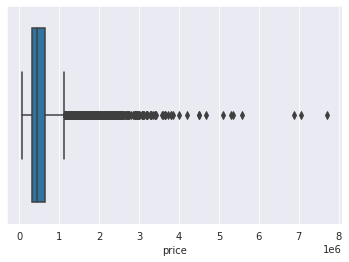

In [18]:
sns.boxplot(df.price);

##Modelagem

In [19]:
# Instânciando os atributos preditores a variável X e transformando em formato de matriz numpy  
X = df.iloc[:,3:20].values

In [20]:
# Instânciando a variável alvo em y e transformando em formato de matriz 
y = df.iloc[:,2].values

In [21]:
# Importa os pacotes para modelagem e avaliação de modelos  
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# Separando em Treino e Teste
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.20,random_state=0)

In [23]:
# Tamanho da distribuição dos dados em Treino e Teste
X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape

((17290, 17), (4323, 17), (17290,), (4323,))

### Avaliação do Algoritmo de regressão

In [24]:
# instanciando os modelos
lr = LinearRegression(normalize=True)
rfr = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 2, random_state=0)
 
# Criando tupla de listagem dos modelos
model_list = ((lr, 'Linear Regression'),
              (rfr, 'Random Forest'))
              
for model, name in model_list:
    model.fit(X_treino, y_treino)
    y_pred = model.predict(X_teste)
    print('-------------------------------------')
    print(f'{name}:')
    print(f'MAE: {mean_absolute_error(y_teste, y_pred)}')
    print(f'MSE: {mean_squared_error(y_teste, y_pred)}')
    print(f'R^2: {r2_score(y_teste, y_pred)}')

-------------------------------------
Linear Regression:
MAE: 121977.05850416423
MSE: 36225914290.96612
R^2: 0.6953866985669428
-------------------------------------
Random Forest:
MAE: 64480.464915488374
MSE: 12634005064.687569
R^2: 0.8937642826026294


##### Salvando o modelo de aprendizado de máquina com a biblioteca " PICKLE "

In [25]:
import pickle

In [26]:
# Salva o modelo em disco 
with open ("rfr.pkl","wb") as file:
    pickle.dump(rfr,file)

In [27]:
# Carrega o modelo
with open ("rfr.pkl","rb") as file:
    model = pickle.load(file)

In [28]:
# Reutilização do modelo salvo fazendo predição do primeiro preço em relação ao conjunto de dados de forma amostral.
print(f'valor predito melhor modelo {model.predict(X_teste)[0].reshape(-1,1)}')
print(f'valor real da base original   {df.price[0]}')

valor predito melhor modelo [[319330.88632064]]
valor real da base original   221900.0
